In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv'

In [3]:
df = pd.read_csv(url, sep=',')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [4]:
#jeg velger regressjon for dette datasettet fordi det handler om pris som forandrer seg med tid.
#regressjon er veldig bra for å gjette en kontinuerlig verdi.
#i tillegg er den god på å vise en konstant rate av endring. 

In [5]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
print(df.shape)

(2845, 7)


In [7]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean    105.797199   107.959321   103.485805   105.853488   105.853488   
std     188.691743   192.434544   184.592519   188.788993   188.788993   
min       3.228000     3.326000     2.996000     3.160000     3.160000   
25%      10.352000    10.748000    10.132000    10.400000    10.400000   
50%      45.868000    46.493999    45.099998    45.902000    45.902000   
75%      65.000000    66.251999    63.993999    65.234001    65.234001   
max     891.380005   900.400024   871.599976   883.090027   883.090027   

             Volume  
count  2.845000e+03  
mean   3.145634e+07  
std    2.845125e+07  
min    5.925000e+05  
25%    1.252200e+07  
50%    2.482100e+07  
75%    4.014650e+07  
max    3.046940e+08  


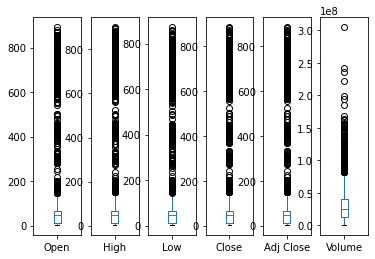

In [8]:
df.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

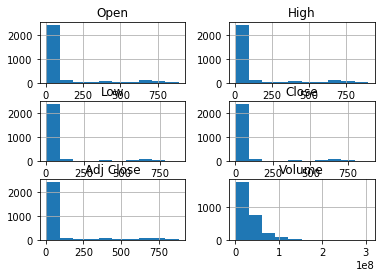

In [9]:
df.hist()
plt.show()

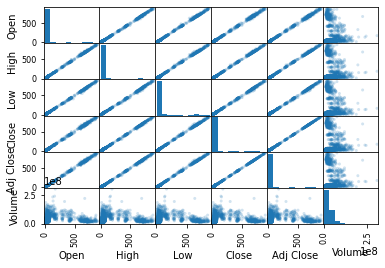

In [10]:
pd.plotting.scatter_matrix(df, alpha=0.2)
plt.show()

In [11]:
df.plot.scatter(x = 'Date', y = 'Open')

<AxesSubplot:xlabel='Date', ylabel='Open'>

Error in callback <function flush_figures at 0x00000142373F2A60> (for post_execute):


KeyboardInterrupt: 

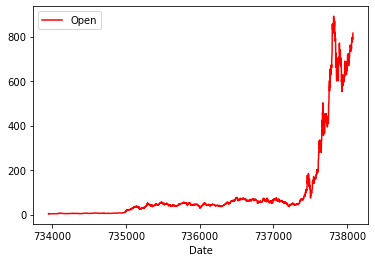

In [19]:
ax1 = df.plot(kind='line', x='Date', y='Open', color='r')    

In [20]:

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [21]:
df["Date"] = pd.to_datetime(df["Date"])

In [22]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [23]:
X = df["Date"]
y = df["Open"]

In [27]:
X = pd.DataFrame(df["Date"]) #Var1
y = pd.DataFrame(df["Open"]) #Result

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train)  # make predictions

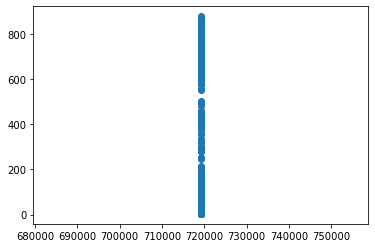

MSE = 36095.455973027645


In [30]:
plt.scatter(X_train, y_train)             #Plot blue dots with real data
plt.plot(X_train, Y_pred, color='red')    #Plot red line with prediction
plt.show()                                #Show the plot
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE

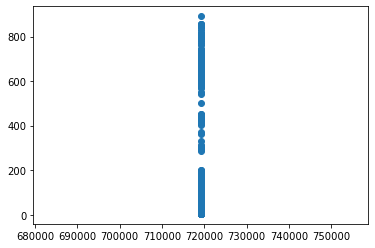

MSE = 34577.90884687326


In [31]:
Y_pred = linear_regressor.predict(X_test)  # Predict the model on X_test
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

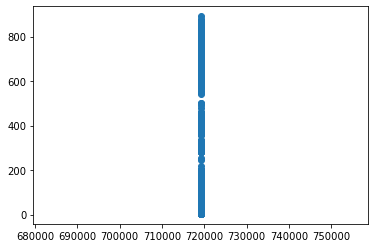

MSE = 35592.05903814024


In [33]:

linear_regressor.fit(X, y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y,Y_pred)))